# 05 · RG window (M12)

Integrate the truncated 3-loop β and visualize the flow components vs. scale.

**Refs**: M12 rg (beta_function/run_rg_flow). 

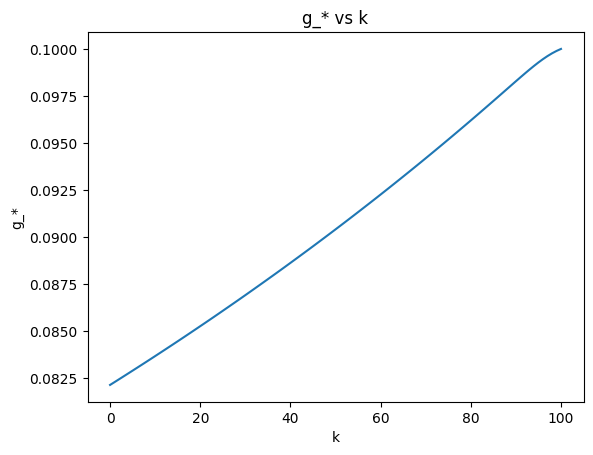

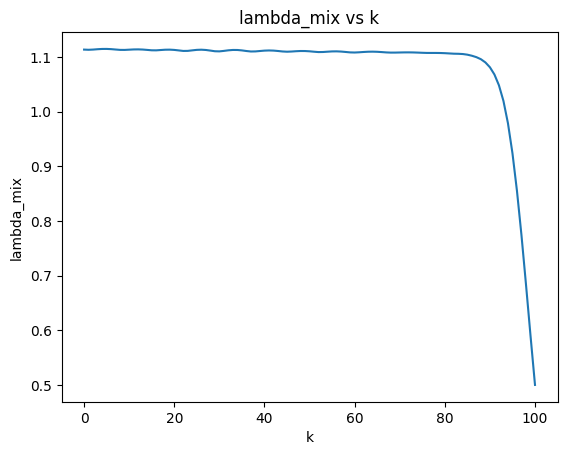

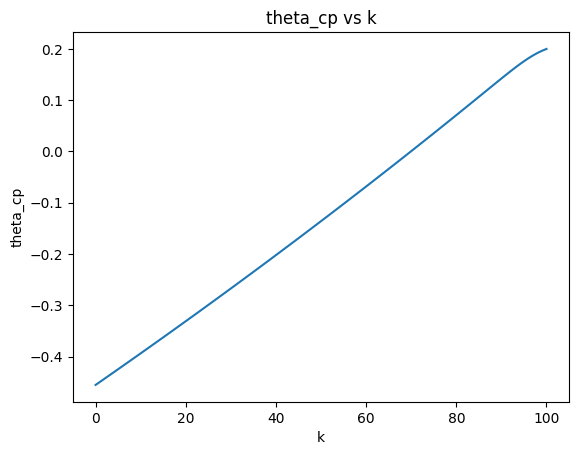

Initial: CouplingVector(g_star=0.1, lambda_mix=0.5, theta_cp=0.2)
Final: CouplingVector(g_star=0.08215234373911118, lambda_mix=1.1134394199845332, theta_cp=-0.45531603100645446)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from emergent.rg import beta_function, CouplingVector, run_rg_flow

q, R = 6, 4
k_start, k_end = 100, 0
g0 = CouplingVector(g_star=0.1, lambda_mix=0.5, theta_cp=0.2)

sol = solve_ivp(fun=beta_function, t_span=[k_start, k_end], y0=g0.to_array(), args=(q,R), dense_output=True)
ks = np.linspace(k_start, k_end, 101)
vals = sol.sol(ks)

plt.figure(); plt.plot(ks, vals[0]); plt.title("g_* vs k"); plt.xlabel("k"); plt.ylabel("g_*"); plt.show()
plt.figure(); plt.plot(ks, vals[1]); plt.title("lambda_mix vs k"); plt.xlabel("k"); plt.ylabel("lambda_mix"); plt.show()
plt.figure(); plt.plot(ks, vals[2]); plt.title("theta_cp vs k"); plt.xlabel("k"); plt.ylabel("theta_cp"); plt.show()

g_final = run_rg_flow(g0, k_start, k_end, q, R)
print("Initial:", g0)
print("Final:", g_final)